# Neural & Behavioral Modeling - Week 7 (Exercises)
by 李彥廷 (b08207008@ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Simulate attentional effects on neurons (10 points)

Please read the following article:

Reynolds, J. H., & Desimone, R. (1999). <a href=https://www.salk.edu/wp-content/uploads/2015/11/rd.pdf>The role of neural mechanisms of attention in solving the binding problem.</a> Neuron, 24(1), 19-29.

and use its model equations in Fig. 10 to reproduce its Fig. 3a:<br><br>
<img src=https://www.researchgate.net/profile/Richard_Wezel/publication/224015518/figure/fig2/AS:213837023322122@1427994127491/When-presented-with-two-visual-stimuli-simultaneously-attention-can-lead-to-changes-in.png>

Note that the stimulus was presented from 0 to 200ms in the Fig. 3a.

In [415]:
def model(x1,x2,attention=False):
    dt=0.01
    w1p=0.2; w1m=0.2
    w2p=1; w2m=0.1
    if attention:
        w2p*=3
        w2m*=3
    A=0.01; B=200
    y = [30]; t=np.arange(0,300,dt)
    for i in t:
        E = w1p*x1+w2p*x2
        I = w1m*x1+w2m*x2
        if i > 200:
            x1 =0
            x2 =0
        y1 = y[-1]
        y.append(y1 + ((B-y1)*E-y1*I-A*y1) * dt)
    
    plot(t, y[0:-1])
    ylim(0, 200)
    xlabel('Time from stimulus onset (ms)')
    ylabel('Spikes per second')
    

刺激的出現與否決定x1或x2是否為0，然後調整w使他們的關係符合圖的樣子。
注意力的效果是把注意的刺激的weight乘以3倍。

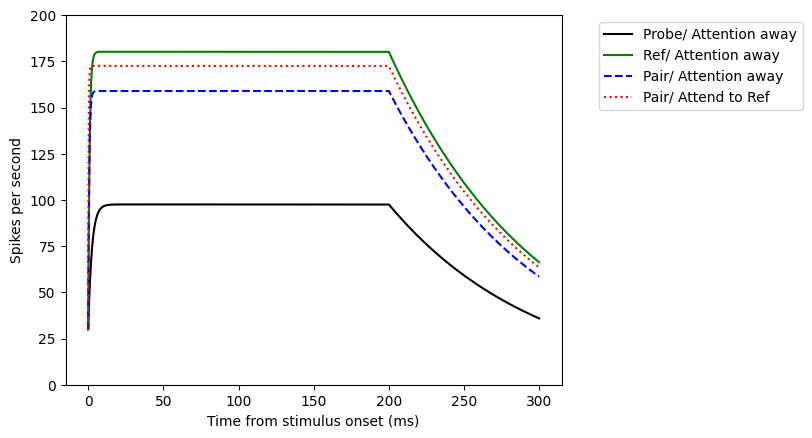

In [416]:
model(1,0)
model(0,1)
model(1,1)
model(1,1,attention=True)
colors = ['black','green', 'blue', 'red']
ls = ['-','-','--',':']
for i in range(len(gca().get_lines())):
    line = gca().get_lines()[i]
    line.set_color(colors[i])
    line.set_linestyle(ls[i])
legend(['Probe/ Attention away','Ref/ Attention away',
        "Pair/ Attention away",'Pair/ Attend to Ref'], bbox_to_anchor=(1.5,1));